In [272]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
import random

In [273]:
titanic_data = pd.read_csv('C:/Users/taham/Desktop/7th semester/AI by Sir Ayyaz/Assignments/Titanic_data_Set.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Fare,Age,SibSp,Parch
0,1,0,3,1,7.2500,22.0,1,0
1,2,1,1,2,71.2833,38.0,1,0
2,3,1,3,2,7.9250,26.0,0,0
3,4,1,1,2,53.1000,35.0,1,0
4,5,0,3,1,8.0500,35.0,0,0


In [274]:
X = titanic_data.drop('Survived',axis=1)
Y = titanic_data['Survived']
# Y.shape

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [276]:
X_train

,PassengerId,Pclass,Sex,Fare,Age,SibSp,Parch
114,115,3,2,14.4583,17.0,0,0
874,875,2,2,24.0000,28.0,1,0
76,77,3,1,7.8958,59.0,0,0
876,877,3,1,9.8458,20.0,0,0
674,675,2,1,0.0000,24.0,0,0
...,...,...,...,...,...,...,...
715,716,3,1,7.6500,19.0,0,0
767,768,3,2,7.7500,30.5,0,0
72,73,2,1,73.5000,21.0,0,0
235,236,3,2,7.5500,30.0,0,0


In [277]:
x_noraml = ['PassengerId','Sex','Pclass','Fare','Age','SibSp','Parch']
# y_normal =Y
X_train= X[x_noraml]
# Y_train=Y[y_normal]

In [278]:
X_train = X_train[x_noraml].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)
X_train.head(10)
list(X_train)

['PassengerId', 'Sex', 'Pclass', 'Fare', 'Age', 'SibSp', 'Parch']

In [279]:
X_train = np.array(X_train)
X_train[0:5]

array([[-1.7291368 , -0.73728105,  0.82691282, -0.50216314, -0.53546848,
         0.43255043, -0.47340772],
       [-1.7252511 ,  1.35481262, -1.56522783,  0.78640362,  0.54160028,
         0.43255043, -0.47340772],
       [-1.7213654 ,  1.35481262,  0.82691282, -0.48857985, -0.26620129,
        -0.47427882, -0.47340772],
       [-1.7174797 ,  1.35481262, -1.56522783,  0.42049407,  0.33964988,
         0.43255043, -0.47340772],
       [-1.713594  , -0.73728105,  0.82691282, -0.48606443,  0.33964988,
        -0.47427882, -0.47340772]])

In [439]:
import random
def betas(d):
    b = random.random()
    w = np.random.rand(d)
    return b,w 
b,w = betas(X_train.shape[1])
print(b,w)

0.10098375822036398 [0.597043   0.0615095  0.69717571 0.68161636 0.9503744  0.03285917
 0.09493191]


In [443]:
b,w = betas(X_test.shape[1])


In [282]:
w.shape

(7,)

In [444]:
def sig(x, w ,X_train):
    Z = x + np.matmul(X_train,w)
    return (1.0 / (1 + np.exp(-Z)))  


In [447]:
def sig(x, w ,X_test):
    Z = x + np.matmul(X_test,w)
    return (1.0 / (1 + np.exp(-Z)))  


In [448]:
y_not = sig(x,w,X_train)
y_not[0:10]

array([0.40662541, 0.41386169, 0.5278692 , 0.36556982, 0.52107751,
       0.42935753, 0.42780304, 0.29222553, 0.55354828, 0.27716608])

In [449]:
y_not = sig(x,w,X_test)
y_not[0:10]

862    1.0
223    1.0
84     1.0
680    1.0
535    1.0
623    1.0
148    1.0
3      1.0
34     1.0
241    1.0
dtype: float64

In [477]:
def cost( y, y_not):
        return - np.sum(np.dot(y.T,np.log(1-y_not)+ np.dot((1-y).T,np.log(1-y_not)))) / ( len(y))


In [485]:
lr = 0.01
type(y_not)

pandas.core.series.Series

In [486]:
x,w = betaUpdate(x,w, Y, y_not,X_train, lr)

x.shape

()

In [491]:
iterations = 1000
lr = 0.01

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.5345229151920199 [0.56422144 0.21197295 0.8135057  0.98449326 0.41011093 0.96305426
 0.18394772]
Iteration:  0 Cost:  249.14397155638966
Iteration:  10 Cost:  246.50919241105197
Iteration:  20 Cost:  243.94270283824028
Iteration:  30 Cost:  241.44238074220834
Iteration:  40 Cost:  239.00616824251895
Iteration:  50 Cost:  236.63207257990467
Iteration:  60 Cost:  234.31816664038044
Iteration:  70 Cost:  232.06258912886258
Iteration:  80 Cost:  229.86354442242296
Iteration:  90 Cost:  227.7193021323414
Iteration:  100 Cost:  225.62819640304286
Iteration:  110 Cost:  223.5886249750683
Iteration:  120 Cost:  221.5990480382266
Iteration:  130 Cost:  219.65798690008853
Iteration:  140 Cost:  217.76402249395593
Iteration:  150 Cost:  215.91579374935296
Iteration:  160 Cost:  214.11199584695044
Iteration:  170 Cost:  212.35137837862572
Iteration:  180 Cost:  210.63274343210776
Iteration:  190 Cost:  208.9549436183606
Iteration:  200 Cost:  207.3168800585366
Iter

999

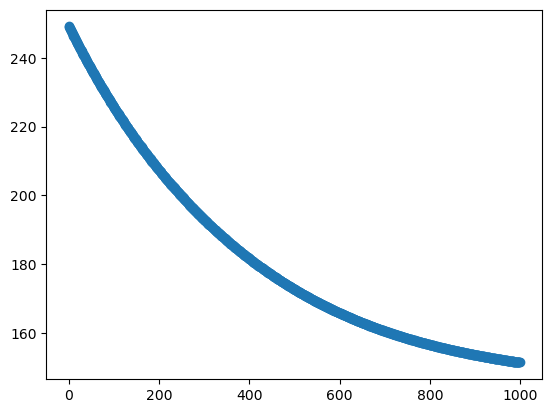

In [492]:
lmodel = LogisticRegression().fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)

len(range(i))

In [494]:
iterations = 1000
lr = 0.1

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.7194332464627968 [0.05867729 0.60333373 0.51670025 0.38188108 0.61012204 0.77450502
 0.39361655]
Iteration:  0 Cost:  247.84048999089592
Iteration:  10 Cost:  229.84298125896487
Iteration:  20 Cost:  215.41222533227293
Iteration:  30 Cost:  203.75312624228317
Iteration:  40 Cost:  194.36906622665032
Iteration:  50 Cost:  186.89943186400154
Iteration:  60 Cost:  181.03877861208122
Iteration:  70 Cost:  176.49914109306604
Iteration:  80 Cost:  173.00216536784927
Iteration:  90 Cost:  170.29659455520772
Iteration:  100 Cost:  168.1785969274701
Iteration:  110 Cost:  166.49602139108063
Iteration:  120 Cost:  165.1397286053599
Iteration:  130 Cost:  164.03192285445138
Iteration:  140 Cost:  163.1165197808699
Iteration:  150 Cost:  162.35236571421586
Iteration:  160 Cost:  161.70870274025177
Iteration:  170 Cost:  161.16215175583332
Iteration:  180 Cost:  160.69467717860053
Iteration:  190 Cost:  160.29218526525295
Iteration:  200 Cost:  159.943537799463
Iter

999

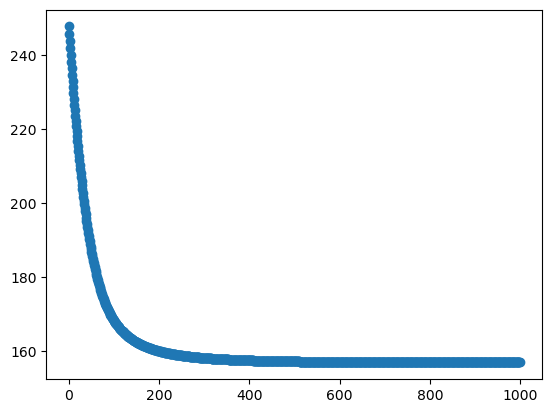

In [495]:
lmodel = LogisticRegression().fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)

len(range(i))

In [497]:
iterations = 1000
lr = 0.05

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.15578499356770403 [0.30857338 0.20798184 0.23167074 0.82568505 0.00642852 0.63702449
 0.37451051]
Iteration:  0 Cost:  175.6048477790021
Iteration:  10 Cost:  167.10818684903364
Iteration:  20 Cost:  159.6145434088892
Iteration:  30 Cost:  153.0424977700045
Iteration:  40 Cost:  147.32133180801225
Iteration:  50 Cost:  142.3847637955868
Iteration:  60 Cost:  138.1664158733769
Iteration:  70 Cost:  134.5970495715007
Iteration:  80 Cost:  131.60352927615745
Iteration:  90 Cost:  129.10973449484686
Iteration:  100 Cost:  127.03948199628816
Iteration:  110 Cost:  125.32059898613406
Iteration:  120 Cost:  123.88857091358842
Iteration:  130 Cost:  122.68857789782906
Iteration:  140 Cost:  121.67576410792249
Iteration:  150 Cost:  120.8143012594099
Iteration:  160 Cost:  120.07592664706017
Iteration:  170 Cost:  119.43842964860737
Iteration:  180 Cost:  118.88431864808904
Iteration:  190 Cost:  118.39973842815841
Iteration:  200 Cost:  117.9736277953959
Iterat

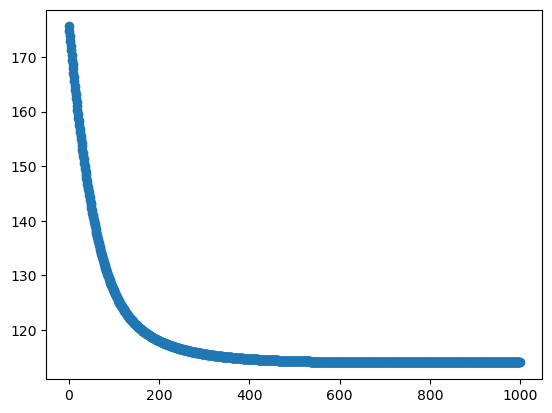

In [498]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)

In [500]:
iterations = 1000
lr = 0.01

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.3822608631748441 [3.18148800e-01 1.28817089e-01 5.80640011e-01 4.34306828e-01
 1.53195114e-01 2.67784427e-01 4.69775206e-04]
Iteration:  0 Cost:  204.59061884442707
Iteration:  10 Cost:  201.90956217799405
Iteration:  20 Cost:  199.34853912150484
Iteration:  30 Cost:  196.9015080481741
Iteration:  40 Cost:  194.56271305198973
Iteration:  50 Cost:  192.32668107710657
Iteration:  60 Cost:  190.18821654773618
Iteration:  70 Cost:  188.14239403906973
Iteration:  80 Cost:  186.1845494586403
Iteration:  90 Cost:  184.31027014046285
Iteration:  100 Cost:  182.51538419238906
Iteration:  110 Cost:  180.7959493810277
Iteration:  120 Cost:  179.1482417885747
Iteration:  130 Cost:  177.5687444319381
Iteration:  140 Cost:  176.05413599636634
Iteration:  150 Cost:  174.60127980301147
Iteration:  160 Cost:  173.2072131019882
Iteration:  170 Cost:  171.8691367590174
Iteration:  180 Cost:  170.5844053841433
Iteration:  190 Cost:  169.3505179347891
Iteration:  200 Cost: 

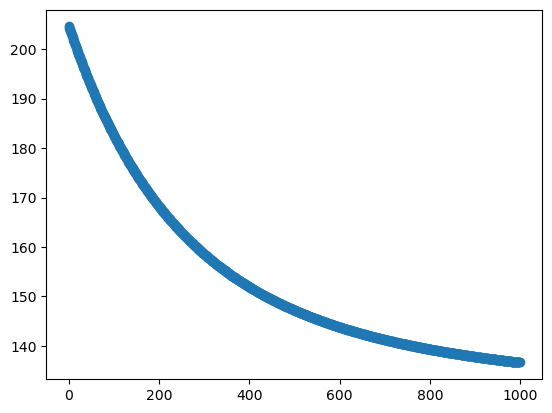

In [501]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)

In [502]:
iterations = 1000
lr = 0.005

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.24675646985374766 [0.61986617 0.92252749 0.04488352 0.12228188 0.12045597 0.14332296
 0.4132625 ]
Iteration:  0 Cost:  158.97283477326724
Iteration:  10 Cost:  158.38138719253655
Iteration:  20 Cost:  157.80037110132227
Iteration:  30 Cost:  157.2296049907225
Iteration:  40 Cost:  156.66891040164703
Iteration:  50 Cost:  156.11811183878555
Iteration:  60 Cost:  155.57703668883477
Iteration:  70 Cost:  155.04551514298018
Iteration:  80 Cost:  154.52338012359786
Iteration:  90 Cost:  154.01046721511202
Iteration:  100 Cost:  153.50661459891845
Iteration:  110 Cost:  153.01166299226392
Iteration:  120 Cost:  152.52545559095185
Iteration:  130 Cost:  152.0478380157284
Iteration:  140 Cost:  151.5786582621926
Iteration:  150 Cost:  151.1177666540605
Iteration:  160 Cost:  150.66501579960774
Iteration:  170 Cost:  150.22026055110828
Iteration:  180 Cost:  149.78335796708257
Iteration:  190 Cost:  149.3541672771675
Iteration:  200 Cost:  148.93254984941956
Ite

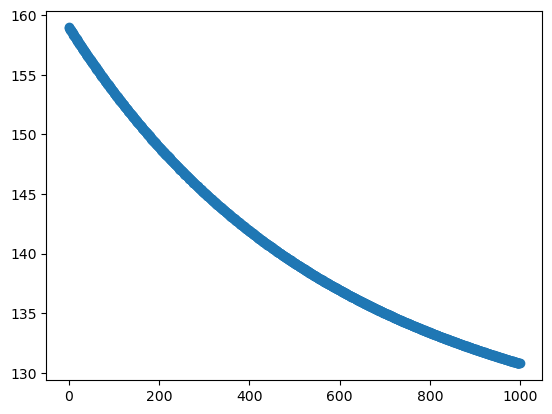

In [503]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)

In [504]:
iterations = 1000
lr = 0.001

total_costs = []
x,w = betas(X_train.shape[1])
print("initial Estimates of x and w: " , x ,w)

for i in range (iterations ):
    y_not = sig(x, w , X_train)
    get_cost = cost (Y, y_not)
    pb = b
    pw = w
    b, w = betaUpdate (pb, pw, Y, y_not, X_train, lr)
    total_costs.append(get_cost)
    if i % 10 == 0:
        print('Iteration: ', i, 'Cost: ', get_cost)
        i += 1
    
print("Final Estimates of  x and w are:\n ", x,w)

initial Estimates of x and w:  0.2878069746085663 [0.58624713 0.51009186 0.79442477 0.11969615 0.00477145 0.3238906
 0.04783166]
Iteration:  0 Cost:  206.54333415743832
Iteration:  10 Cost:  206.1988432300691
Iteration:  20 Cost:  205.85600100537155
Iteration:  30 Cost:  205.51480005754743
Iteration:  40 Cost:  205.1752329542765
Iteration:  50 Cost:  204.83729225807545
Iteration:  60 Cost:  204.50097052763064
Iteration:  70 Cost:  204.1662603191038
Iteration:  80 Cost:  203.83315418741063
Iteration:  90 Cost:  203.50164468747172
Iteration:  100 Cost:  203.17172437543516
Iteration:  110 Cost:  202.8433858098706
Iteration:  120 Cost:  202.51662155293508
Iteration:  130 Cost:  202.19142417150942
Iteration:  140 Cost:  201.8677862383054
Iteration:  150 Cost:  201.54570033294414
Iteration:  160 Cost:  201.22515904300508
Iteration:  170 Cost:  200.90615496504535
Iteration:  180 Cost:  200.58868070559043
Iteration:  190 Cost:  200.27272888209507
Iteration:  200 Cost:  199.95829212387585
Itera

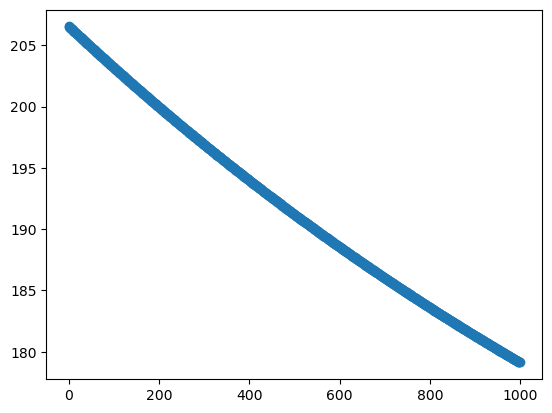

In [505]:
lreg = LogisticRegression()
lmodel = lreg.fit(X_train, Y)
lmodel.intercept_

lmodel.coef_

plt.scatter( range(iterations), total_costs)